In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import h5py
import json
import os

Read dataset and create training, validation, and test sets

In [2]:
data = pd.read_csv(os.path.join(os.getcwd(), 'abalone-data.txt'),
                  names=['sex', 'length', 'diameter', 'height', 'whole_weight',
                        'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'])

In [3]:
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data['sex'] = LabelEncoder().fit_transform(data['sex'])
data = pd.get_dummies(data, columns=['sex'])

In [5]:
data.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_0,sex_1,sex_2
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [6]:
X = data.drop('rings', axis=1)
y = data['rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=3)
print('Training data = {}, {}'.format(X_train.shape, y_train.shape))
print('Validation data = {}, {}'.format(X_val.shape, y_val.shape))
print('Testing data = {}, {}'.format(X_test.shape, y_test.shape))

Training data = (3383, 10), (3383,)
Validation data = (376, 10), (376,)
Testing data = (418, 10), (418,)


In [7]:
# standardize continuous values to zero mean and unit variance
scaler = StandardScaler()
X_train[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']] = scaler.fit_transform(
    X_train[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']])

In [8]:
X_val[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']] = scaler.transform(
    X_val[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']])
X_test[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']] = scaler.transform(
    X_test[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']])

/Users/SimonMcDonnell/miniconda3/envs/diss/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/SimonMcDonnell/miniconda3/envs/diss/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Create a simple neural network to perform regression, with only one hidden layer

In [11]:
model_sig = keras.Sequential([
    keras.layers.Dense(1500, activation=tf.nn.sigmoid, input_shape=(10,)),
    keras.layers.Dense(1)
])
optimizer = tf.train.GradientDescentOptimizer(0.001)
model_sig.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [17]:
history_sig = model_sig.fit(X_train, y_train, epochs=100, validation_data=[X_val, y_val])

Train on 3383 samples, validate on 376 samples
Epoch 1/100
3383/3383 [==============================] - 1s 239us/step - loss: 4.9398 - mean_absolute_error: 1.6007 - val_loss: 4.7455 - val_mean_absolute_error: 1.5674
Epoch 2/100
3383/3383 [==============================] - 1s 289us/step - loss: 4.9239 - mean_absolute_error: 1.6020 - val_loss: 4.7403 - val_mean_absolute_error: 1.5772
Epoch 3/100
3383/3383 [==============================] - 1s 281us/step - loss: 4.9014 - mean_absolute_error: 1.6032 - val_loss: 4.7449 - val_mean_absolute_error: 1.5671
Epoch 4/100
3383/3383 [==============================] - 1s 270us/step - loss: 4.8953 - mean_absolute_error: 1.5992 - val_loss: 5.1702 - val_mean_absolute_error: 1.5693
Epoch 5/100
3383/3383 [==============================] - 1s 266us/step - loss: 4.9189 - mean_absolute_error: 1.5983 - val_loss: 4.8902 - val_mean_absolute_error: 1.6703
Epoch 6/100
3383/3383 [==============================] - 1s 240us/step - loss: 4.9428 - mean_absolute_error:

Epoch 49/100
3383/3383 [==============================] - 1s 288us/step - loss: 4.8786 - mean_absolute_error: 1.5970 - val_loss: 4.7822 - val_mean_absolute_error: 1.5460
Epoch 50/100
3383/3383 [==============================] - 1s 228us/step - loss: 4.8803 - mean_absolute_error: 1.5918 - val_loss: 4.8639 - val_mean_absolute_error: 1.5455
Epoch 51/100
3383/3383 [==============================] - 1s 235us/step - loss: 4.9267 - mean_absolute_error: 1.6052 - val_loss: 4.7372 - val_mean_absolute_error: 1.5701
Epoch 52/100
3383/3383 [==============================] - 1s 240us/step - loss: 4.8960 - mean_absolute_error: 1.5990 - val_loss: 4.9925 - val_mean_absolute_error: 1.5531
Epoch 53/100
3383/3383 [==============================] - 1s 224us/step - loss: 4.9245 - mean_absolute_error: 1.6032 - val_loss: 4.9542 - val_mean_absolute_error: 1.5505
Epoch 54/100
3383/3383 [==============================] - 1s 233us/step - loss: 4.9407 - mean_absolute_error: 1.6051 - val_loss: 4.7216 - val_mean_abs

3383/3383 [==============================] - 1s 317us/step - loss: 4.9002 - mean_absolute_error: 1.6014 - val_loss: 4.7830 - val_mean_absolute_error: 1.5448
Epoch 98/100
3383/3383 [==============================] - 1s 329us/step - loss: 4.8868 - mean_absolute_error: 1.5977 - val_loss: 5.1532 - val_mean_absolute_error: 1.5704
Epoch 99/100
3383/3383 [==============================] - 1s 298us/step - loss: 4.8784 - mean_absolute_error: 1.5938 - val_loss: 4.7961 - val_mean_absolute_error: 1.6437
Epoch 100/100
3383/3383 [==============================] - 1s 333us/step - loss: 4.8711 - mean_absolute_error: 1.5988 - val_loss: 5.0141 - val_mean_absolute_error: 1.7308


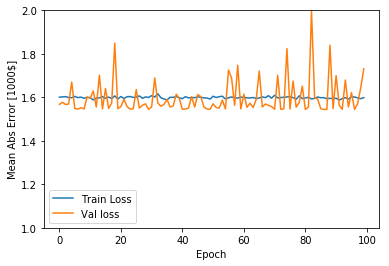

In [18]:
plot_history(history_sig)

In [19]:
weights_sig = model_sig.get_weights()
np.save('model_sig_weights', weights_sig, allow_pickle=True)

In [13]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([1, 2])

In [296]:
model1 = keras.Sequential([
    keras.layers.Dense(1500, activation=tf.nn.relu, input_shape=(10,)),
    keras.layers.Dense(1, activation=tf.nn.relu)
])
optimizer = tf.train.GradientDescentOptimizer(0.001)
model1.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [297]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 1500)              16500     
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 1501      
Total params: 18,001
Trainable params: 18,001
Non-trainable params: 0
_________________________________________________________________


In [298]:
model2 = keras.Sequential([
    keras.layers.Dense(1500, activation=tf.nn.relu, input_shape=(10,)),
    keras.layers.Dense(750, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.relu)
])
optimizer = tf.train.GradientDescentOptimizer(0.001)
model2.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [299]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 1500)              16500     
_________________________________________________________________
dense_70 (Dense)             (None, 750)               1125750   
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 751       
Total params: 1,143,001
Trainable params: 1,143,001
Non-trainable params: 0
_________________________________________________________________


In [300]:
history1 = model1.fit(X_train, y_train, epochs=100, validation_data=[X_val, y_val])

Train on 3383 samples, validate on 376 samples
Epoch 1/100
3383/3383 [==============================] - 2s 577us/step - loss: 46.8017 - mean_absolute_error: 5.7569 - val_loss: 16.9966 - val_mean_absolute_error: 3.1454
Epoch 2/100
3383/3383 [==============================] - 1s 230us/step - loss: 12.3392 - mean_absolute_error: 2.5903 - val_loss: 8.0126 - val_mean_absolute_error: 2.0206
Epoch 3/100
3383/3383 [==============================] - 1s 216us/step - loss: 7.0956 - mean_absolute_error: 1.8631 - val_loss: 5.9041 - val_mean_absolute_error: 1.7431
Epoch 4/100
3383/3383 [==============================] - 1s 258us/step - loss: 5.9691 - mean_absolute_error: 1.7058 - val_loss: 5.4080 - val_mean_absolute_error: 1.6534
Epoch 5/100
3383/3383 [==============================] - 1s 223us/step - loss: 5.5940 - mean_absolute_error: 1.6621 - val_loss: 5.2599 - val_mean_absolute_error: 1.6490
Epoch 6/100
3383/3383 [==============================] - 1s 220us/step - loss: 5.4046 - mean_absolute_err

Epoch 49/100
3383/3383 [==============================] - 1s 214us/step - loss: 4.5032 - mean_absolute_error: 1.5129 - val_loss: 4.3506 - val_mean_absolute_error: 1.5179
Epoch 50/100
3383/3383 [==============================] - 1s 209us/step - loss: 4.4897 - mean_absolute_error: 1.5139 - val_loss: 4.4111 - val_mean_absolute_error: 1.5257
Epoch 51/100
3383/3383 [==============================] - 1s 210us/step - loss: 4.4878 - mean_absolute_error: 1.5112 - val_loss: 4.3291 - val_mean_absolute_error: 1.5158
Epoch 52/100
3383/3383 [==============================] - 1s 208us/step - loss: 4.4927 - mean_absolute_error: 1.5109 - val_loss: 4.3204 - val_mean_absolute_error: 1.5194
Epoch 53/100
3383/3383 [==============================] - 1s 210us/step - loss: 4.4843 - mean_absolute_error: 1.5108 - val_loss: 4.3562 - val_mean_absolute_error: 1.5168
Epoch 54/100
3383/3383 [==============================] - 1s 209us/step - loss: 4.4735 - mean_absolute_error: 1.5105 - val_loss: 4.3183 - val_mean_abs

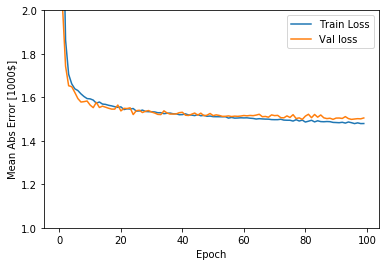

In [301]:
plot_history(history1)

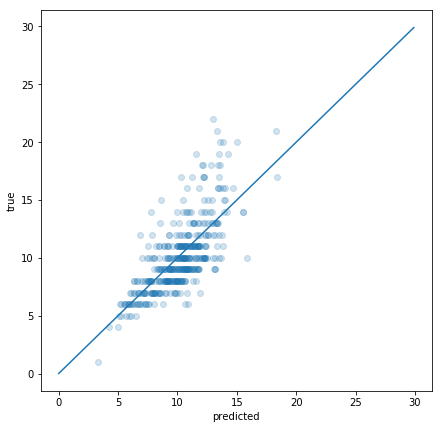

In [302]:
pred = model1.predict(X_test)
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111)
ax.scatter(pred, y_test, alpha=0.2)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
ax.plot(np.arange(0, 30, 0.1), np.arange(0, 30, 0.1))

In [303]:
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=[X_val, y_val])

Train on 3383 samples, validate on 376 samples
Epoch 1/100
3383/3383 [==============================] - 16s 5ms/step - loss: 32.3234 - mean_absolute_error: 4.3465 - val_loss: 8.4894 - val_mean_absolute_error: 2.0564
Epoch 2/100
3383/3383 [==============================] - 14s 4ms/step - loss: 6.8271 - mean_absolute_error: 1.7915 - val_loss: 5.4689 - val_mean_absolute_error: 1.6950
Epoch 3/100
3383/3383 [==============================] - 15s 4ms/step - loss: 5.5292 - mean_absolute_error: 1.6563 - val_loss: 5.0605 - val_mean_absolute_error: 1.5950
Epoch 4/100
3383/3383 [==============================] - 15s 4ms/step - loss: 5.2415 - mean_absolute_error: 1.6156 - val_loss: 4.8926 - val_mean_absolute_error: 1.6198
Epoch 5/100
3383/3383 [==============================] - 15s 4ms/step - loss: 5.0623 - mean_absolute_error: 1.5967 - val_loss: 4.8846 - val_mean_absolute_error: 1.6001
Epoch 6/100
3383/3383 [==============================] - 14s 4ms/step - loss: 4.9149 - mean_absolute_error: 1.57

3383/3383 [==============================] - 14s 4ms/step - loss: 4.1739 - mean_absolute_error: 1.4399 - val_loss: 4.1120 - val_mean_absolute_error: 1.4885
Epoch 98/100
3383/3383 [==============================] - 13s 4ms/step - loss: 4.1679 - mean_absolute_error: 1.4408 - val_loss: 4.0170 - val_mean_absolute_error: 1.4722
Epoch 99/100
3383/3383 [==============================] - 13s 4ms/step - loss: 4.1512 - mean_absolute_error: 1.4383 - val_loss: 4.0999 - val_mean_absolute_error: 1.5041
Epoch 100/100
3383/3383 [==============================] - 14s 4ms/step - loss: 4.1526 - mean_absolute_error: 1.4404 - val_loss: 4.0566 - val_mean_absolute_error: 1.4815


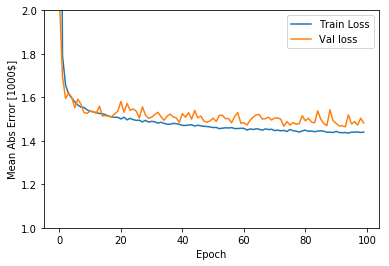

In [304]:
plot_history(history2)

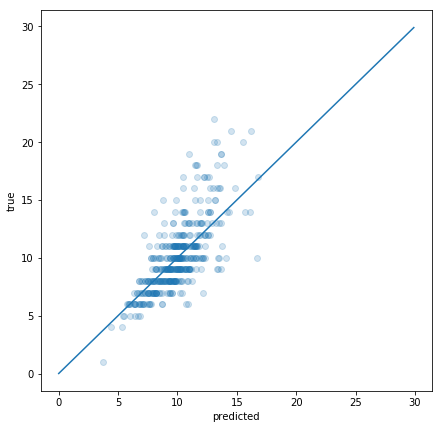

In [305]:
pred = model2.predict(X_test)
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111)
ax.scatter(pred, y_test, alpha=0.2)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
ax.plot(np.arange(0, 30, 0.1), np.arange(0, 30, 0.1))

In [316]:
with open('model1.json', 'w') as outfile:
    json.dump(model1.to_json(), outfile)

In [317]:
with open('model2.json', 'w') as outfile:
    json.dump(model2.to_json(), outfile)

In [322]:
json_string = json.load(open('model1.json'))
model3 = keras.models.model_from_json(json_string)
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 1500)              16500     
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 1501      
Total params: 18,001
Trainable params: 18,001
Non-trainable params: 0
_________________________________________________________________


Save the weights of the trained models

In [326]:
weights1 = model1.get_weights()
weights2 = model2.get_weights()

In [328]:
np.save('model1_weights', weights1, allow_pickle=True)
np.save('model2_weights', weights2, allow_pickle=True)

This is how you would load the weights back up into a file

In [331]:
weights3 = np.load('model1_weights.npy')
weights4 = np.load('model2_weights.npy')

In [332]:
model3 = keras.Sequential([
    keras.layers.Dense(1500, activation=tf.nn.relu, input_shape=(10,)),
    keras.layers.Dense(1, activation=tf.nn.relu)
])

In [334]:
model3.set_weights(weights3)

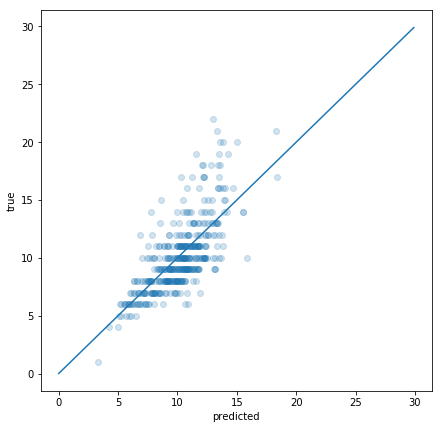

In [336]:
pred = model3.predict(X_test)
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111)
ax.scatter(pred, y_test, alpha=0.2)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
ax.plot(np.arange(0, 30, 0.1), np.arange(0, 30, 0.1))

In [352]:
print('Weights[0] = first layer weights{}'.format(weights3[0].shape))
print('Weights[1] = first layer bias {}'.format(weights3[1].shape))
print('Weights[2] = second layer weights {}'.format(weights3[2].shape))
print('Weights[3] = second layer bias {}'.format(weights3[3].shape))

Weights[0] = first layer weights(10, 1500)
Weights[1] = first layer bias (1500,)
Weights[2] = second layer weights (1500, 1)
Weights[3] = second layer bias (1,)
